# Exploratory Data Analysis of Call Centers 

## Call Analysis Report

This report will focus on the following aspects:

- **Call Distribution Overview**: A breakdown of calls across different channels or categories.
- **Geographic Call Patterns**: Call count segmented by location to uncover regional activity.
- **Daily Call Volume Trends**: A timeline analysis showing fluctuations in call volume over time.
- **In-depth Sentiment Analysis**: Evaluation of caller sentiment to identify CSAT Score, Sentiment type, Reason etc.
- **Top vs. Underperforming Centers (CSAT + Sentiment)


In [55]:
import pandas as pd

In [56]:
df=pd.read_csv(r"E:\General\Call-Center-Sentiment-Sample-Data.csv")

In [57]:
df.head()

,ID,Customer Name,Sentiment,CSAT Score,Call Timestamp,Reason,City,State,Channel,Response Time,Call Duration (Minutes),Call Center,Unnamed: 12
0,PIS-39858047,Frances Gullefant,Neutral,8,1/1/2024,Billing Question,Charleston,West Virginia,Chatbot,Within SLA,14,Chicago/IL,NaN
1,ROH-40287216,Harcourt Zoanetti,Negative,5,1/1/2024,Billing Question,Honolulu,Hawaii,Call-Center,Within SLA,32,Los Angeles/CA,NaN
2,NKC-39578431,Washington Oxteby,Negative,3,1/2/2024,Billing Question,Dallas,Texas,Chatbot,Within SLA,6,Denver/CO,NaN
3,APY-17008648,Rafe Duffitt,Very Negative,4,1/2/2024,Billing Question,Fort Myers,Florida,Email,Below SLA,26,Los Angeles/CA,NaN
4,MHK-38443501,Tris Bent,Positive,8,1/2/2024,Billing Question,Tuscaloosa,Alabama,Web,Within SLA,26,Los Angeles/CA,NaN


In [58]:
df = df.drop(columns=["Unnamed: 12"])

In [59]:
df.head()

,ID,Customer Name,Sentiment,CSAT Score,Call Timestamp,Reason,City,State,Channel,Response Time,Call Duration (Minutes),Call Center
0,PIS-39858047,Frances Gullefant,Neutral,8,1/1/2024,Billing Question,Charleston,West Virginia,Chatbot,Within SLA,14,Chicago/IL
1,ROH-40287216,Harcourt Zoanetti,Negative,5,1/1/2024,Billing Question,Honolulu,Hawaii,Call-Center,Within SLA,32,Los Angeles/CA
2,NKC-39578431,Washington Oxteby,Negative,3,1/2/2024,Billing Question,Dallas,Texas,Chatbot,Within SLA,6,Denver/CO
3,APY-17008648,Rafe Duffitt,Very Negative,4,1/2/2024,Billing Question,Fort Myers,Florida,Email,Below SLA,26,Los Angeles/CA
4,MHK-38443501,Tris Bent,Positive,8,1/2/2024,Billing Question,Tuscaloosa,Alabama,Web,Within SLA,26,Los Angeles/CA


## Distribution of Calls

In [60]:
df['Call Timestamp'] = pd.to_datetime(df['Call Timestamp']).dt.strftime('%Y-%m-%d')

In [61]:
df['Call Timestamp']

0     2024-01-01
1     2024-01-01
2     2024-01-02
3     2024-01-02
4     2024-01-02
         ...    
65    2024-01-29
66    2024-01-30
67    2024-01-30
68    2024-01-31
69    2024-01-31
Name: Call Timestamp, Length: 70, dtype: object

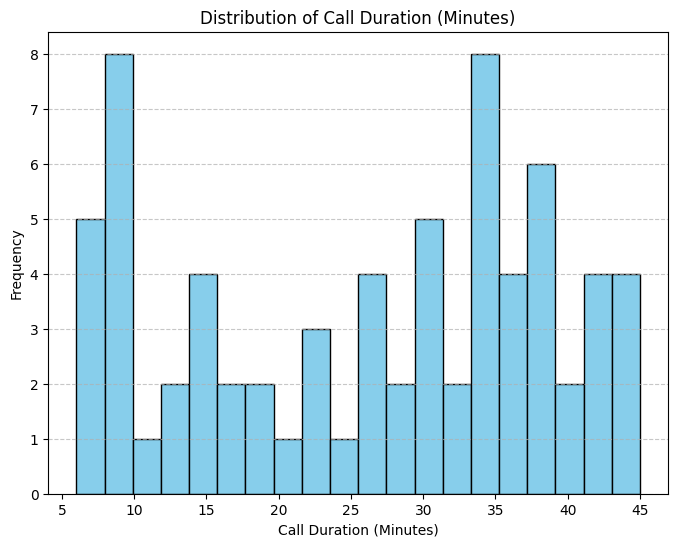

In [62]:
import matplotlib.pyplot as plt
# Analyze the distribution of Call Duration (Minutes)
call_duration = df['Call Duration (Minutes)']

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.hist(call_duration, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Call Duration (Minutes)')
plt.xlabel('Call Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Distribution of Calls across States

In [63]:
calls_by_channel_state = df.groupby(['Channel', 'State']).size().reset_index(name='Call Count')

In [64]:
calls_by_channel_state

,Channel,State,Call Count
0,Call-Center,Arkansas,1
1,Call-Center,California,4
2,Call-Center,District of Columbia,1
3,Call-Center,Florida,2
4,Call-Center,Hawaii,1
5,Call-Center,Illinois,3
6,Call-Center,Iowa,1
7,Call-Center,Kansas,1
8,Call-Center,Louisiana,1
9,Call-Center,Minnesota,2


## Call volume trends

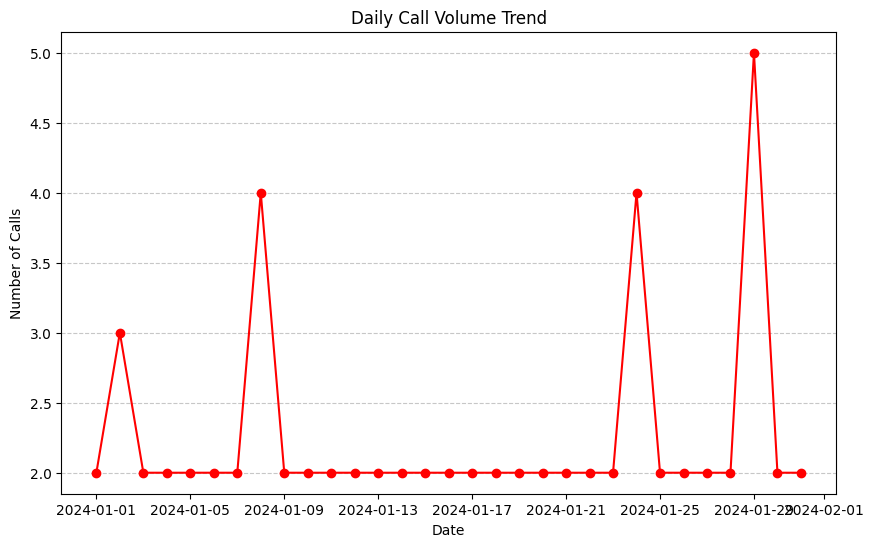

In [65]:
# Convert 'Call Timestamp' to datetime format
df['Call Timestamp'] = pd.to_datetime(df['Call Timestamp'])

# Group by date and count calls
daily_call_volume = df.groupby(df['Call Timestamp'].dt.date).size()

# Plot the trend
plt.figure(figsize=(10, 6))
daily_call_volume.plot(kind='line', color='red', marker='o')
plt.title('Daily Call Volume Trend')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Sentiment Analysis

### Average CSAT Score

Sentiment
Negative         29
Very Negative    15
Positive         10
Neutral           9
Very Positive     7
Name: count, dtype: int64


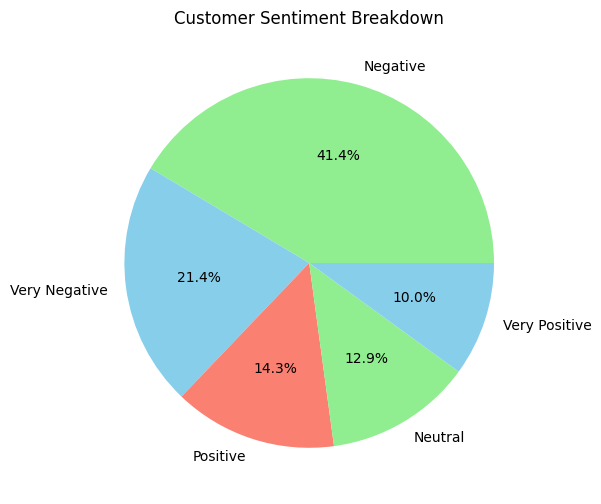

In [66]:
sentiment_breakdown = df['Sentiment'].value_counts()

print(sentiment_breakdown)

plt.figure(figsize=(8, 6))
sentiment_breakdown.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'skyblue', 'salmon'])
plt.title('Customer Sentiment Breakdown')
plt.ylabel('')  # Remove the default ylabel
plt.show()

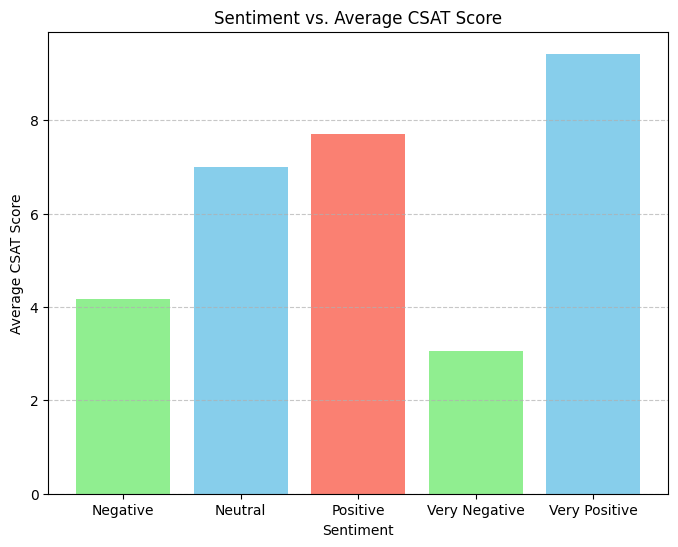

In [67]:
sentiment_vs_csat = df.groupby('Sentiment')['CSAT Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_vs_csat['Sentiment'], sentiment_vs_csat['CSAT Score'], color=['lightgreen', 'skyblue', 'salmon'])
plt.title('Sentiment vs. Average CSAT Score')
plt.xlabel('Sentiment')
plt.ylabel('Average CSAT Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df_cleaned=df

### Sentiment vs. Response Time (Within SLA / Below SLA)

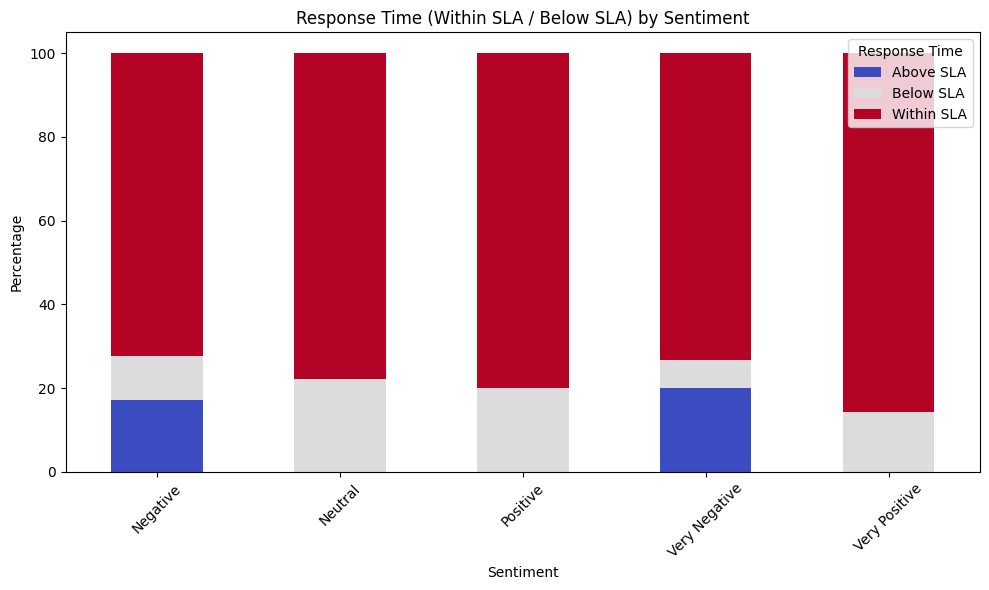

In [76]:
# Crosstab for sentiment and response time
sentiment_response_time = pd.crosstab(df_cleaned["Sentiment"], df_cleaned["Response Time"], normalize='index') * 100

# Plot stacked bar chart
sentiment_response_time.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Response Time (Within SLA / Below SLA) by Sentiment")
plt.ylabel("Percentage")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.legend(title="Response Time")
plt.tight_layout()
plt.show()


### Average Response Time & Call Duration by Call Center

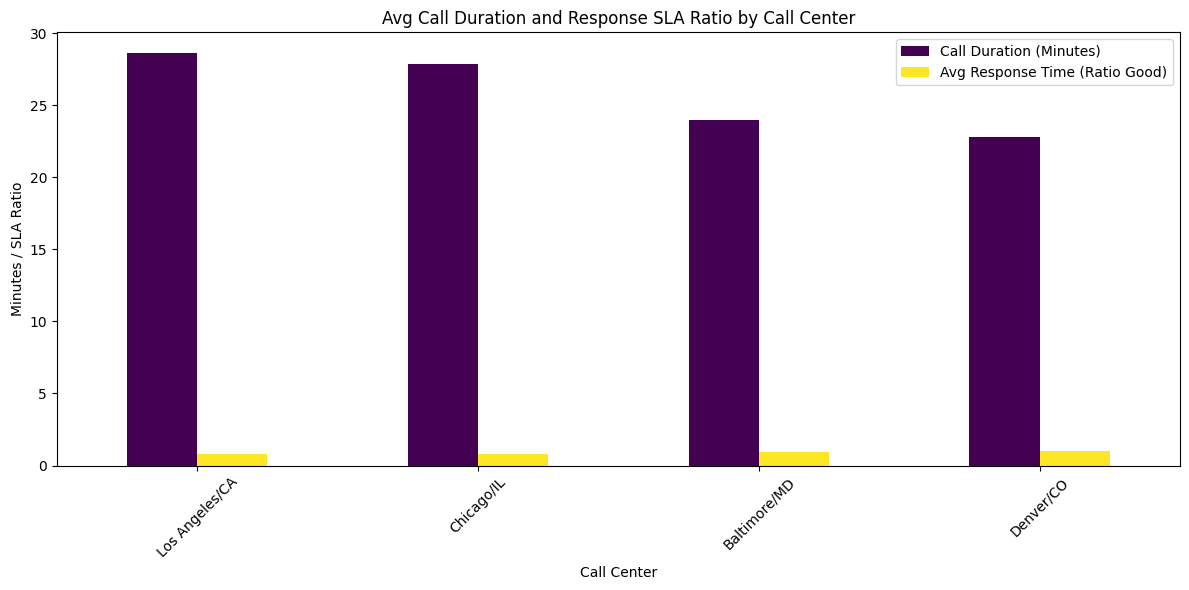

In [77]:
# Average Call Duration and Response Time by Call Center
callcenter_stats = df_cleaned.groupby("Call Center")[["Call Duration (Minutes)"]].mean()

# Convert 'Response Time' to numeric for averaging
df_cleaned["Response Time Numeric"] = df_cleaned["Response Time"].map({
    "Within SLA": 1,  # 1 = good
    "Below SLA": 0   # 0 = bad
})
callcenter_stats["Avg Response Time (Ratio Good)"] = df_cleaned.groupby("Call Center")["Response Time Numeric"].mean()

# Plotting
callcenter_stats.sort_values("Call Duration (Minutes)", ascending=False).plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Avg Call Duration and Response SLA Ratio by Call Center")
plt.ylabel("Minutes / SLA Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top vs. Underperforming Centers (CSAT + Sentiment)

In [78]:
# Average CSAT and Positive Sentiment ratio by call center
callcenter_perf = df_cleaned.groupby("Call Center").agg({
    "CSAT Score": "mean",
    "Sentiment": lambda x: (x == "Positive").mean()
}).rename(columns={"CSAT Score": "Avg CSAT", "Sentiment": "Positive Sentiment Ratio"})

# Add Performance Score (weighted)
callcenter_perf["Performance Score"] = 0.6 * callcenter_perf["Avg CSAT"] + 0.4 * callcenter_perf["Positive Sentiment Ratio"]

# Sort to find top and bottom performers
top_performers = callcenter_perf.sort_values("Performance Score", ascending=False).head(5)
bottom_performers = callcenter_perf.sort_values("Performance Score", ascending=True).head(5)

# Display results
print("🏆 Top Performing Call Centers:\n", top_performers)
print("\n⚠️ Underperforming Call Centers:\n", bottom_performers)


🏆 Top Performing Call Centers:
                 Avg CSAT  Positive Sentiment Ratio  Performance Score
Call Center                                                          
Los Angeles/CA  6.000000                  0.200000           3.680000
Baltimore/MD    5.148148                  0.148148           3.148148
Chicago/IL      4.714286                  0.000000           2.828571
Denver/CO       3.500000                  0.000000           2.100000

⚠️ Underperforming Call Centers:
                 Avg CSAT  Positive Sentiment Ratio  Performance Score
Call Center                                                          
Denver/CO       3.500000                  0.000000           2.100000
Chicago/IL      4.714286                  0.000000           2.828571
Baltimore/MD    5.148148                  0.148148           3.148148
Los Angeles/CA  6.000000                  0.200000           3.680000
